data are from https://webrobots.io/kickstarter-datasets/ 

Description of each column:
- backers_count - number of people who contributed funds to the project
- blurb - short description of the project
- category - contains the category and sub-category of the project
- converted_pledged_amount - amount of money pledged, converted to the currency in the 'current_currency' column
- country - country the project creator is from
- created_at - date and time of when the project was initially created on Kickstarter
- creator - name of the project creator and other information about them, e.g. Kickstarter id number
- currency - original currency the project goal was denominated in
- currency_symbol - symbol of the original currency the project goal was denominated in
- currency_trailing_code - code of the original currency the project goal was denominated in
- current_currency - currency the project goal was converted to
- deadline - date and time of when the project will close for donations
- disable_communication - whether or not a project owner disabled communication with their backers
- friends - unclear (null or empty)
- fx_rate - foreign exchange rate between the original currency and the current_currency
- goal - funding goal
- id - id number of the project
- is_backing - unclear (null or false)
- is_starrable - whether or not a project can be starred (liked and saved) by users
- is_starred - whether or not a project has been starred (liked and saved) by users
- launched_at - date and time of when the project was launched for funding
- location - contains the town or city of the project creator
- name - name of the project
- permissions - unclear (null or empty)
- photo - contains a link and information to the project's photo/s
- pledged - amount pledged in the current_currency
- profile - details about the project's profile, including id number and various visual settings
- slug - name of the project with hyphens instead of spaces
- source_url - url for the project's category
- spotlight - after a project has been successful, it is spotlighted on the Kickstarter website
- staff_pick - whether a project was highlighted as a staff_pick when it was launched/live
- state - whether a project was successful, failed, canceled, suspending or still live
- state_changed_at - date and time of when a project's status was changed (same as the deadline for successful and failed projects)
- static_usd_rate - conversion rate between the original currency and USD
- urls - url to the project's page
- usd_pledged - amount pledged in USD
- usd_type - domestic or international

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
import pickle
import json
from multiprocessing.pool import ThreadPool

In [3]:
# cd Kickstarter_2019-01-17T03_20_02_630Z/
!pwd

/Users/fahimehkhaleghi/Documents/Kickstarter_success


# Getting the Data

In [4]:
def getting_data(data_folder):
    kick_starter = None
    for outer_folder in glob(data_folder):
        print(outer_folder)
        for full_path in glob(os.path.join(outer_folder, "*")):
            print("\t" + full_path)
            single_file = pd.read_csv(full_path)
            if kick_starter is None:
                kick_starter = single_file
            else:                
                # kick_starter = pd.concat(kick_starter, single_file)
                kick_starter = kick_starter.append(single_file)
        return kick_starter

In [5]:
kick_starter_data = getting_data('/Users/fahimehkhaleghi/Downloads/Kickstarter Data/*')

/Users/fahimehkhaleghi/Downloads/Kickstarter Data/Kickstarter_2019-02-14T03_20_04_734Z
	/Users/fahimehkhaleghi/Downloads/Kickstarter Data/Kickstarter_2019-02-14T03_20_04_734Z/Kickstarter040.csv
	/Users/fahimehkhaleghi/Downloads/Kickstarter Data/Kickstarter_2019-02-14T03_20_04_734Z/Kickstarter054.csv
	/Users/fahimehkhaleghi/Downloads/Kickstarter Data/Kickstarter_2019-02-14T03_20_04_734Z/Kickstarter041.csv
	/Users/fahimehkhaleghi/Downloads/Kickstarter Data/Kickstarter_2019-02-14T03_20_04_734Z/Kickstarter043.csv
	/Users/fahimehkhaleghi/Downloads/Kickstarter Data/Kickstarter_2019-02-14T03_20_04_734Z/Kickstarter042.csv
	/Users/fahimehkhaleghi/Downloads/Kickstarter Data/Kickstarter_2019-02-14T03_20_04_734Z/Kickstarter052.csv
	/Users/fahimehkhaleghi/Downloads/Kickstarter Data/Kickstarter_2019-02-14T03_20_04_734Z/Kickstarter046.csv
	/Users/fahimehkhaleghi/Downloads/Kickstarter Data/Kickstarter_2019-02-14T03_20_04_734Z/Kickstarter.csv
	/Users/fahimehkhaleghi/Downloads/Kickstarter Data/Kickstart

In [6]:
pickle.dump(kick_starter_data, open("kickstarter.pkl", "wb" ) )

In [7]:
data_1 = pickle.load(open('kickstarter.pkl', 'rb'))

In [8]:
data_1.shape

(208474, 37)

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
#Dropping unwated columns 
data_1 = data_1.drop(columns = ['creator','currency_symbol','urls','currency_trailing_code','friends','pledged',\
                                'usd_type','photo','permissions','id','friends','source_url',\
                                'is_starrable','name','is_starred','profile','disable_communication','static_usd_rate',\
                                'fx_rate','currency','is_backing','slug','converted_pledged_amount','current_currency',\
                                'pledged', 'spotlight']) 

In [11]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208474 entries, 0 to 3818
Data columns (total 13 columns):
backers_count       208474 non-null int64
blurb               208466 non-null object
category            208474 non-null object
country             208474 non-null object
created_at          208474 non-null int64
deadline            208474 non-null int64
goal                208474 non-null float64
launched_at         208474 non-null int64
location            208248 non-null object
staff_pick          208474 non-null bool
state               208474 non-null object
state_changed_at    208474 non-null int64
usd_pledged         208474 non-null float64
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 20.9+ MB


In [12]:
#Looking for null values, there is 8 null values in blurb and 226 in location, because the dataset is big and deleting 
#the rows with null values will be less than 5% of our data so it is safe to drop the null row!
data_1.isna().sum()

backers_count         0
blurb                 8
category              0
country               0
created_at            0
deadline              0
goal                  0
launched_at           0
location            226
staff_pick            0
state                 0
state_changed_at      0
usd_pledged           0
dtype: int64

In [13]:
data_1.dropna(axis = 0, how ='any', inplace = True) 

In [14]:
#no more null values in our data
data_1.isna().sum()

backers_count       0
blurb               0
category            0
country             0
created_at          0
deadline            0
goal                0
launched_at         0
location            0
staff_pick          0
state               0
state_changed_at    0
usd_pledged         0
dtype: int64

In [15]:
pickle.dump(data_1, open("kickstarter.pkl", "wb" ) )

Cleaned data pickled to be used for further analysis 

In [16]:
data_1 = pickle.load(open('kickstarter.pkl', 'rb'))


# Category

In [17]:
data_1['category'].iloc[0]

'{"id":292,"name":"Comedy","slug":"film & video/comedy","position":3,"parent_id":11,"color":16734574,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/film%20&%20video/comedy"}}}'

In [18]:
from ast import literal_eval
main_category = data_1['category']
main_category = main_category.apply(literal_eval)

In [19]:
main_category[0:10].iloc[0]

{'id': 292,
 'name': 'Comedy',
 'slug': 'film & video/comedy',
 'position': 3,
 'parent_id': 11,
 'color': 16734574,
 'urls': {'web': {'discover': 'http://www.kickstarter.com/discover/categories/film%20&%20video/comedy'}}}

In [20]:
sub_category = []
for i, slug in enumerate(d['slug'].split('/')[0] for d in main_category): 
    sub_category.append(slug)

In [21]:
data_1['sub_category'] = sub_category

In [22]:
sub_category = data_1['sub_category'].value_counts()
sub_category

film & video    27583
music           27242
technology      21082
art             20496
publishing      20145
food            16169
games           14007
fashion         12010
design           8858
comics           8778
photography      8073
crafts           7164
theater          6829
journalism       5772
dance            4032
Name: sub_category, dtype: int64

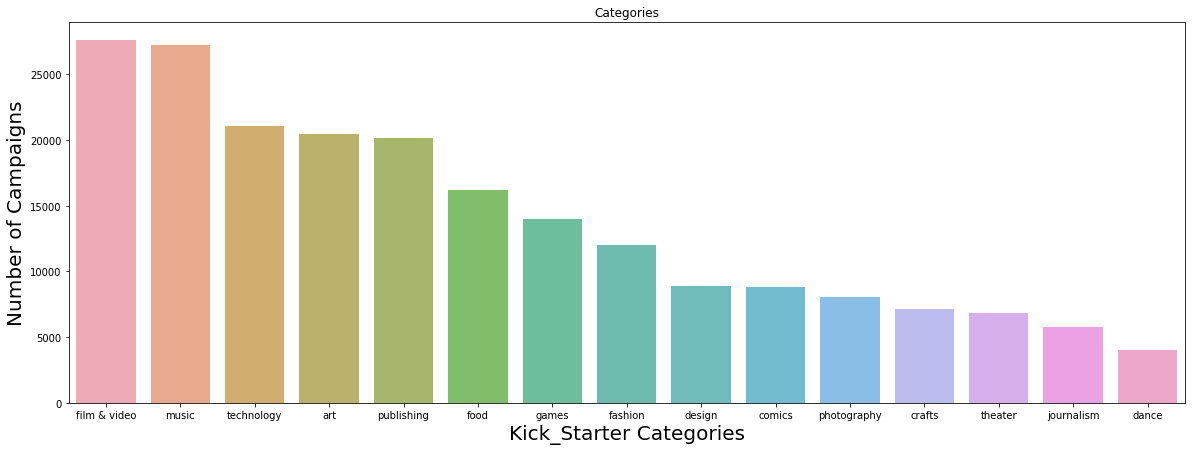

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize=(20,7));
sns.barplot(sub_category.index, sub_category.values, alpha=.8);
plt.title('Categories', fontdict=None, loc='center', pad=None);
plt.xlabel('Kick_Starter Categories', fontsize = 20, fontdict=None, labelpad=None);
plt.ylabel('Number of Campaigns', fontsize = 20,fontdict=None, labelpad=None);
plt.show();
plt.savefig("Categories_campaigns_kickstarter.png");


In [24]:
data_1.drop(columns=['category'], inplace= True)

# Location

In [25]:
location_dict = data_1["location"].apply(json.loads)
location_dict = location_dict.apply(lambda x : x["name"])
# location = location_dict.values
# location = data_1['location'].value_counts()
data_1['location'] = location_dict

In [26]:
location = data_1['location'].value_counts()[:11]

In [27]:
location

Los Angeles      9675
London           7840
New York         7754
Chicago          3890
San Francisco    3375
Brooklyn         3290
Portland         2740
Seattle          2730
Austin           2210
Atlanta          2208
Toronto          2189
Name: location, dtype: int64

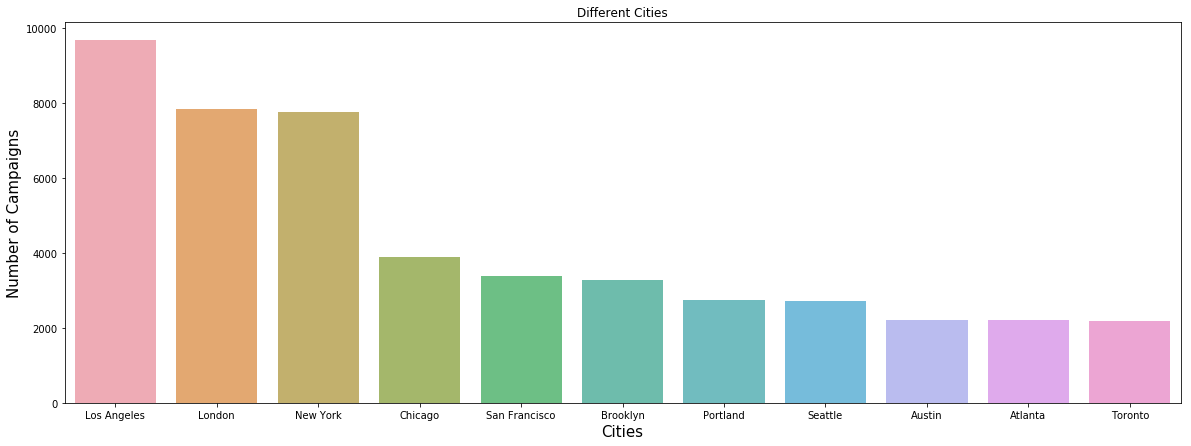

<Figure size 432x288 with 0 Axes>

In [88]:
plt.figure(figsize=(20,7))
sns.barplot(location.index, location.values, alpha=.8)
plt.title('Different Cities')
plt.xlabel('Cities', fontsize = 15)
plt.ylabel('Number of Campaigns', fontsize = 15)
plt.show()

# Country

In [28]:
country_data = data_1['country'].value_counts()
country_data

US    148028
GB     22909
CA      9747
AU      4838
DE      3408
FR      2622
MX      2317
IT      2294
ES      1939
NL      1834
SE      1401
HK      1070
NZ       911
DK       908
SG       736
CH       660
IE       640
BE       563
NO       505
AT       496
JP       357
LU        57
Name: country, dtype: int64

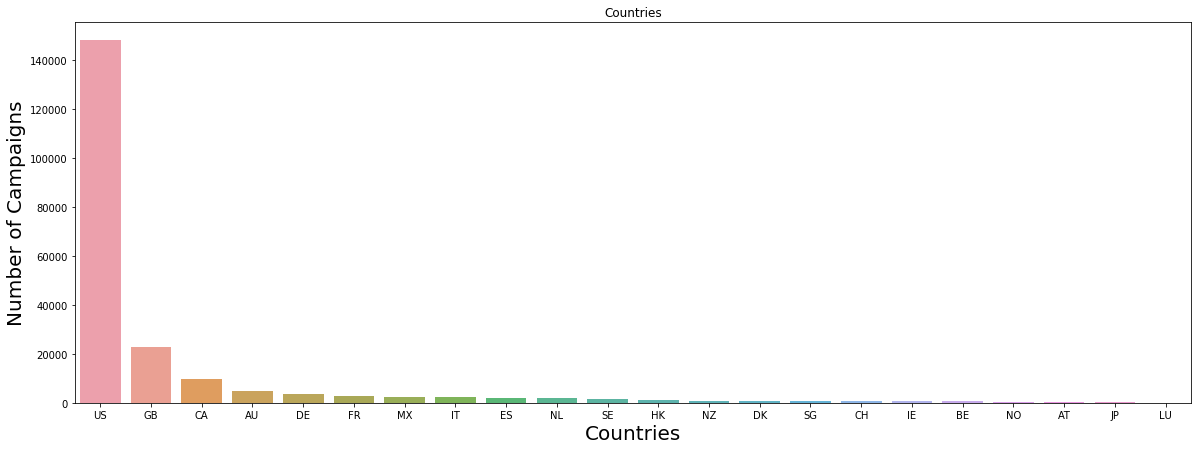

<Figure size 432x288 with 0 Axes>

In [93]:
plt.figure(figsize=(20,7))
sns.barplot(country_data.index, country_data.values, alpha=.9)
plt.title('Countries')
plt.xlabel('Countries', fontsize = 20)
plt.ylabel('Number of Campaigns', fontsize = 20)
plt.show()
plt.savefig("Cities.png")

In [29]:
data_1["country_data"] = (np.where(data_1["country"].isin( list(country_data[country_data>30000].index)),
                               data_1["country"],"Other"))

In [30]:
country_data_2 = data_1['country_data'].value_counts()

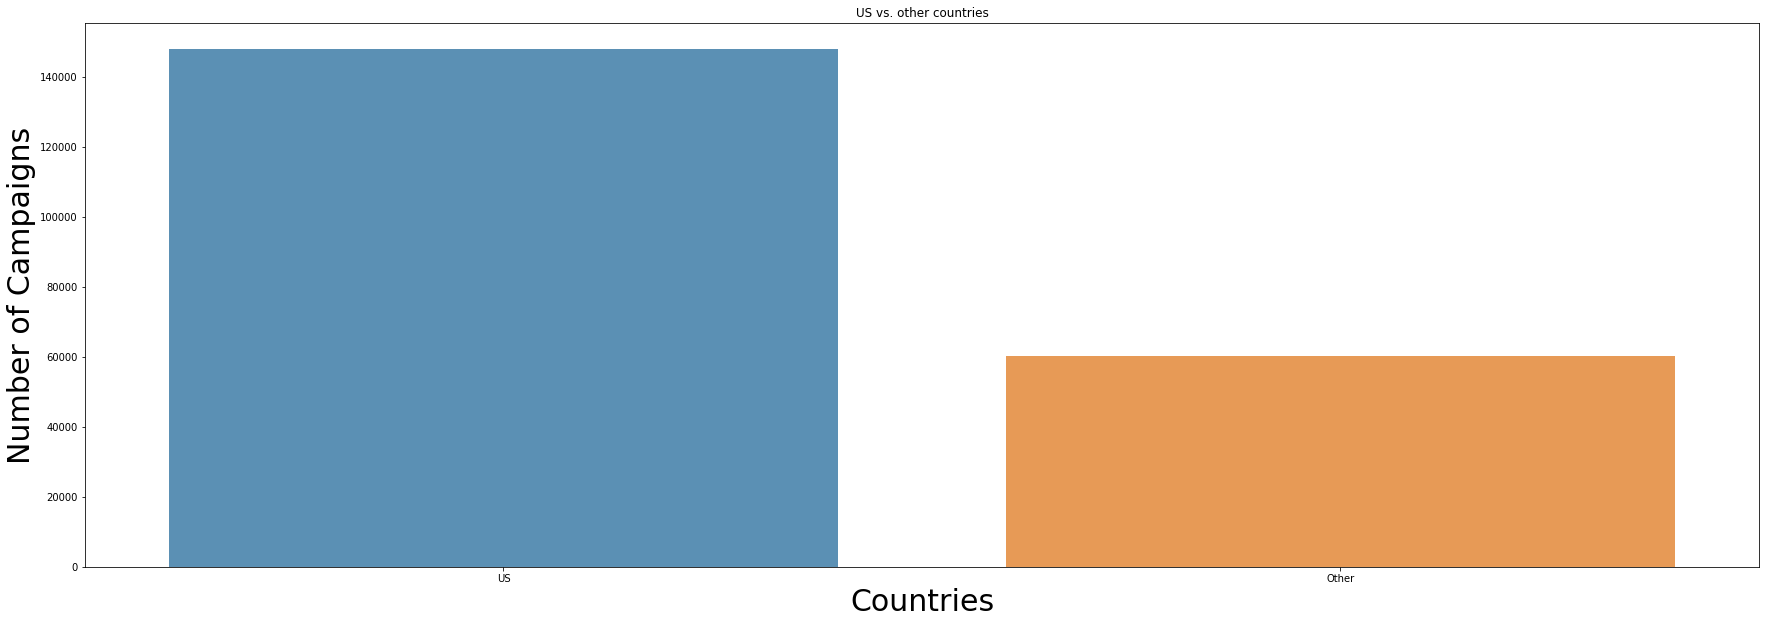

<Figure size 432x288 with 0 Axes>

In [31]:
plt.figure(figsize=(30,10))
sns.barplot(country_data_2.index, country_data_2.values, alpha=.8)
plt.title('US vs. other countries')
plt.xlabel('Countries', fontsize = 30)
plt.ylabel('Number of Campaigns', fontsize =30)
plt.show()
plt.savefig("Country_other.png")

In [32]:
data_1.drop(columns=['country'], inplace= True)

# Converting datetime columns

In [33]:
data_1[['created_at', 'deadline', 'launched_at', 'state_changed_at']].head(3)

,created_at,deadline,launched_at,state_changed_at
0,1489891481,1494132705,1491540705,1494132705
1,1508479978,1512917074,1509893074,1512917074
2,1426499822,1429596000,1427147079,1429596012


In [34]:
converted_list = ['created_at', 'deadline', 'launched_at', 'state_changed_at']
for c in converted_list:
    data_1[c] = pd.to_datetime(data_1[c], origin='unix', unit='s')

In [35]:
print(f"The dataset contains projects added to Kickstarter between {min(data_1.created_at).strftime('%d %B %Y')} and {max(data_1.created_at).strftime('%d %B %Y')}.")

The dataset contains projects added to Kickstarter between 22 April 2009 and 13 February 2019.


In [36]:
data_1[['created_at', 'deadline', 'launched_at', 'state_changed_at']].head(3)

,created_at,deadline,launched_at,state_changed_at
0,2017-03-19 02:44:41,2017-05-07 04:51:45,2017-04-07 04:51:45,2017-05-07 04:51:45
1,2017-10-20 06:12:58,2017-12-10 14:44:34,2017-11-05 14:44:34,2017-12-10 14:44:34
2,2015-03-16 09:57:02,2015-04-21 06:00:00,2015-03-23 21:44:39,2015-04-21 06:00:12


# State_successful

In [37]:
data_1 = pd.get_dummies(columns = ['state'], data = data_1)

# Blurb 

In [38]:
blurb = data_1['blurb'].astype('str')

In [39]:
print(type(blurb))
print(type(data_1['blurb']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [40]:
data_1['blurb'].iloc[0]

'A comedy web series about the inherently funny things about start up culture - and politics.'

In [41]:
len(data_1['blurb'].str.split(' ').iloc[0])

16

In [42]:
length_blurb = len(data_1['blurb'].str.split(' '))             

In [43]:
def length_of_blrub(sentence):

    length_words = len(sentence.split(' '))  
    
    return length_words

In [44]:
data_1['length_blurb'] = data_1['blurb'].apply(length_of_blrub)

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

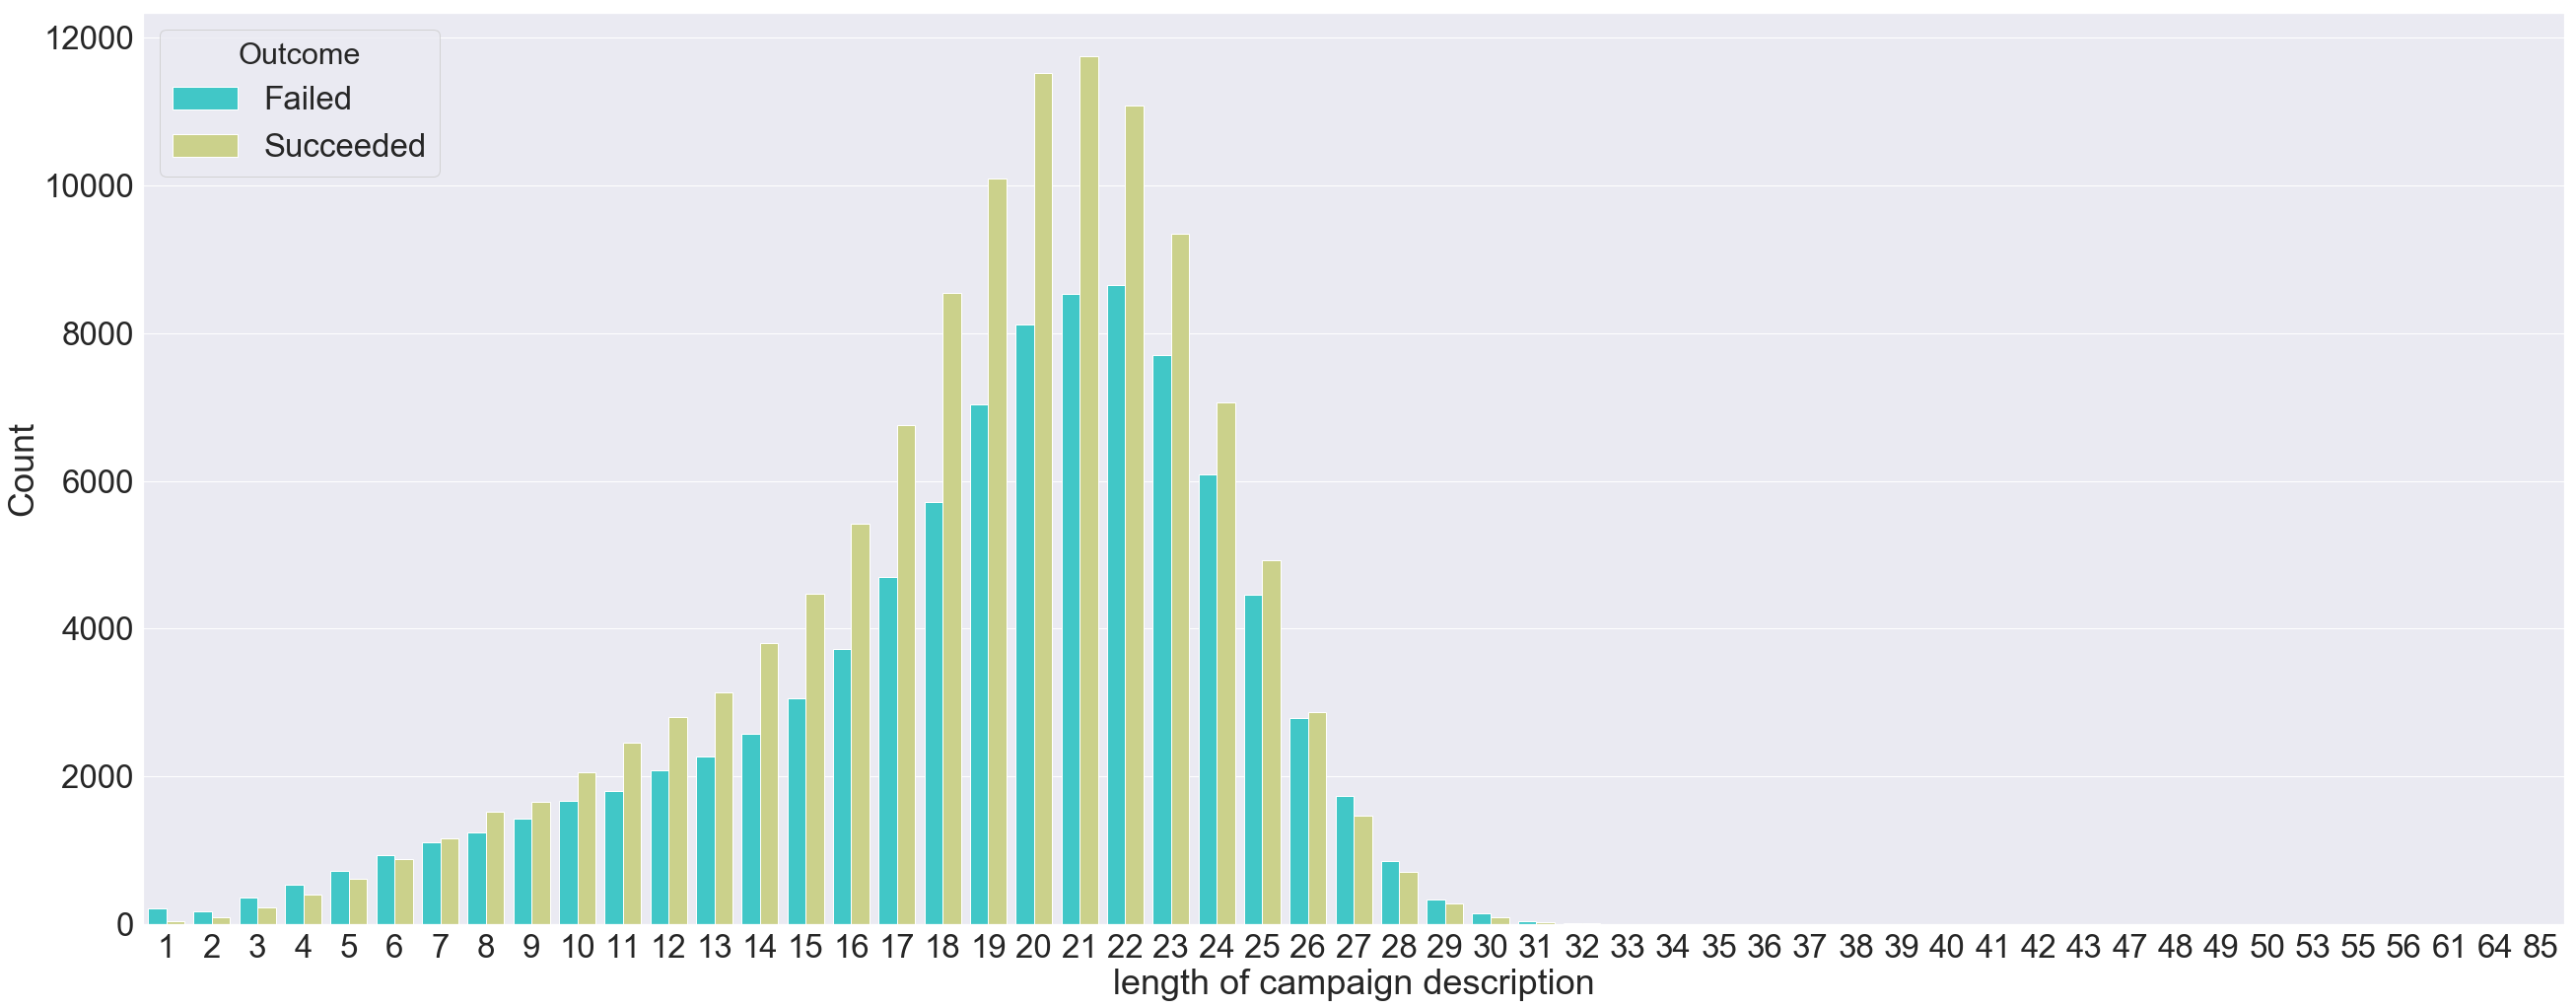

In [113]:
sns.set(font_scale=3) 
plt.figure(figsize=(44,17))
ax = sns.countplot(x = 'length_blurb', hue = 'state_successful', data=data_1, palette = 'rainbow')
leg = ax.get_legend()
leg.set_title("Outcome")
labs = leg.texts
labs[0].set_text("Failed")
labs[1].set_text("Succeeded")

ax.set(xlabel='length of campaign description', ylabel='Count');
plt.savefig('eda.svg')
plt.savefig('eda.png')
plt.tight_layout

In [114]:
data_1['launched_at'].sort_index()

0      2017-04-07 04:51:45
0      2015-11-03 08:28:24
0      2014-11-14 14:21:38
0      2014-09-17 18:30:24
0      2013-06-11 15:22:09
0      2015-10-29 15:36:18
0      2016-07-11 18:01:04
0      2017-04-01 08:46:44
0      2018-08-10 23:56:19
0      2017-03-19 19:06:20
0      2015-08-07 21:35:10
0      2018-10-09 14:00:02
0      2018-02-08 05:04:33
0      2014-12-05 12:07:58
0      2018-09-18 13:01:09
0      2016-05-26 10:58:19
0      2015-10-13 11:02:26
0      2016-06-04 02:31:55
0      2015-09-07 18:00:55
0      2016-05-30 14:39:41
0      2014-08-01 18:10:01
0      2013-08-19 13:32:10
0      2018-02-02 02:58:25
0      2015-02-03 20:24:04
0      2016-09-19 11:51:34
0      2015-02-02 20:26:02
0      2012-08-06 22:37:23
0      2018-01-24 17:27:50
0      2015-01-28 14:21:35
0      2017-05-05 01:20:19
               ...        
3819   2018-03-20 13:49:19
3819   2018-03-27 00:28:38
3819   2016-10-31 10:23:15
3819   2018-05-01 23:57:48
3819   2017-10-22 19:39:54
3819   2018-12-03 23:45:21
3

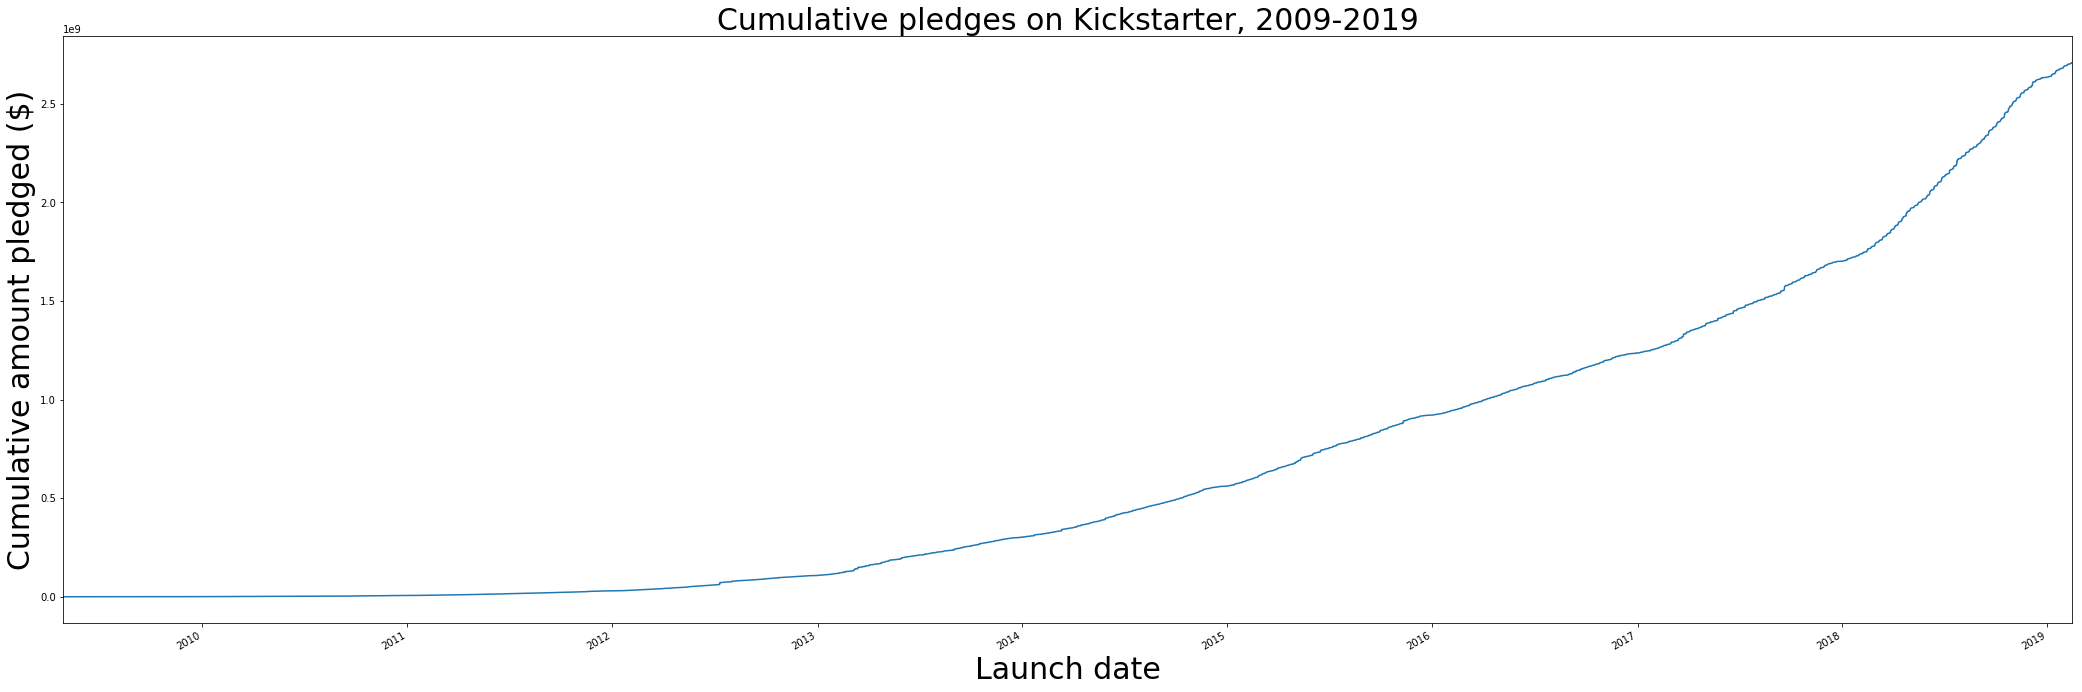

<Figure size 432x288 with 0 Axes>

In [45]:
# Plotting the cumulative amount pledged on Kickstarter
plt.figure(figsize=(36,12))
data_1.set_index('launched_at').sort_index().usd_pledged.cumsum().plot()
plt.xlim('2009-04-28', '2019-02-14') 
plt.xlabel('Launch date', fontsize=30)
plt.ylabel('Cumulative amount pledged ($)', fontsize=30)
plt.title('Cumulative pledges on Kickstarter, 2009-2019', fontsize=30)
plt.show()
plt.savefig("cumulative_pledges.png")

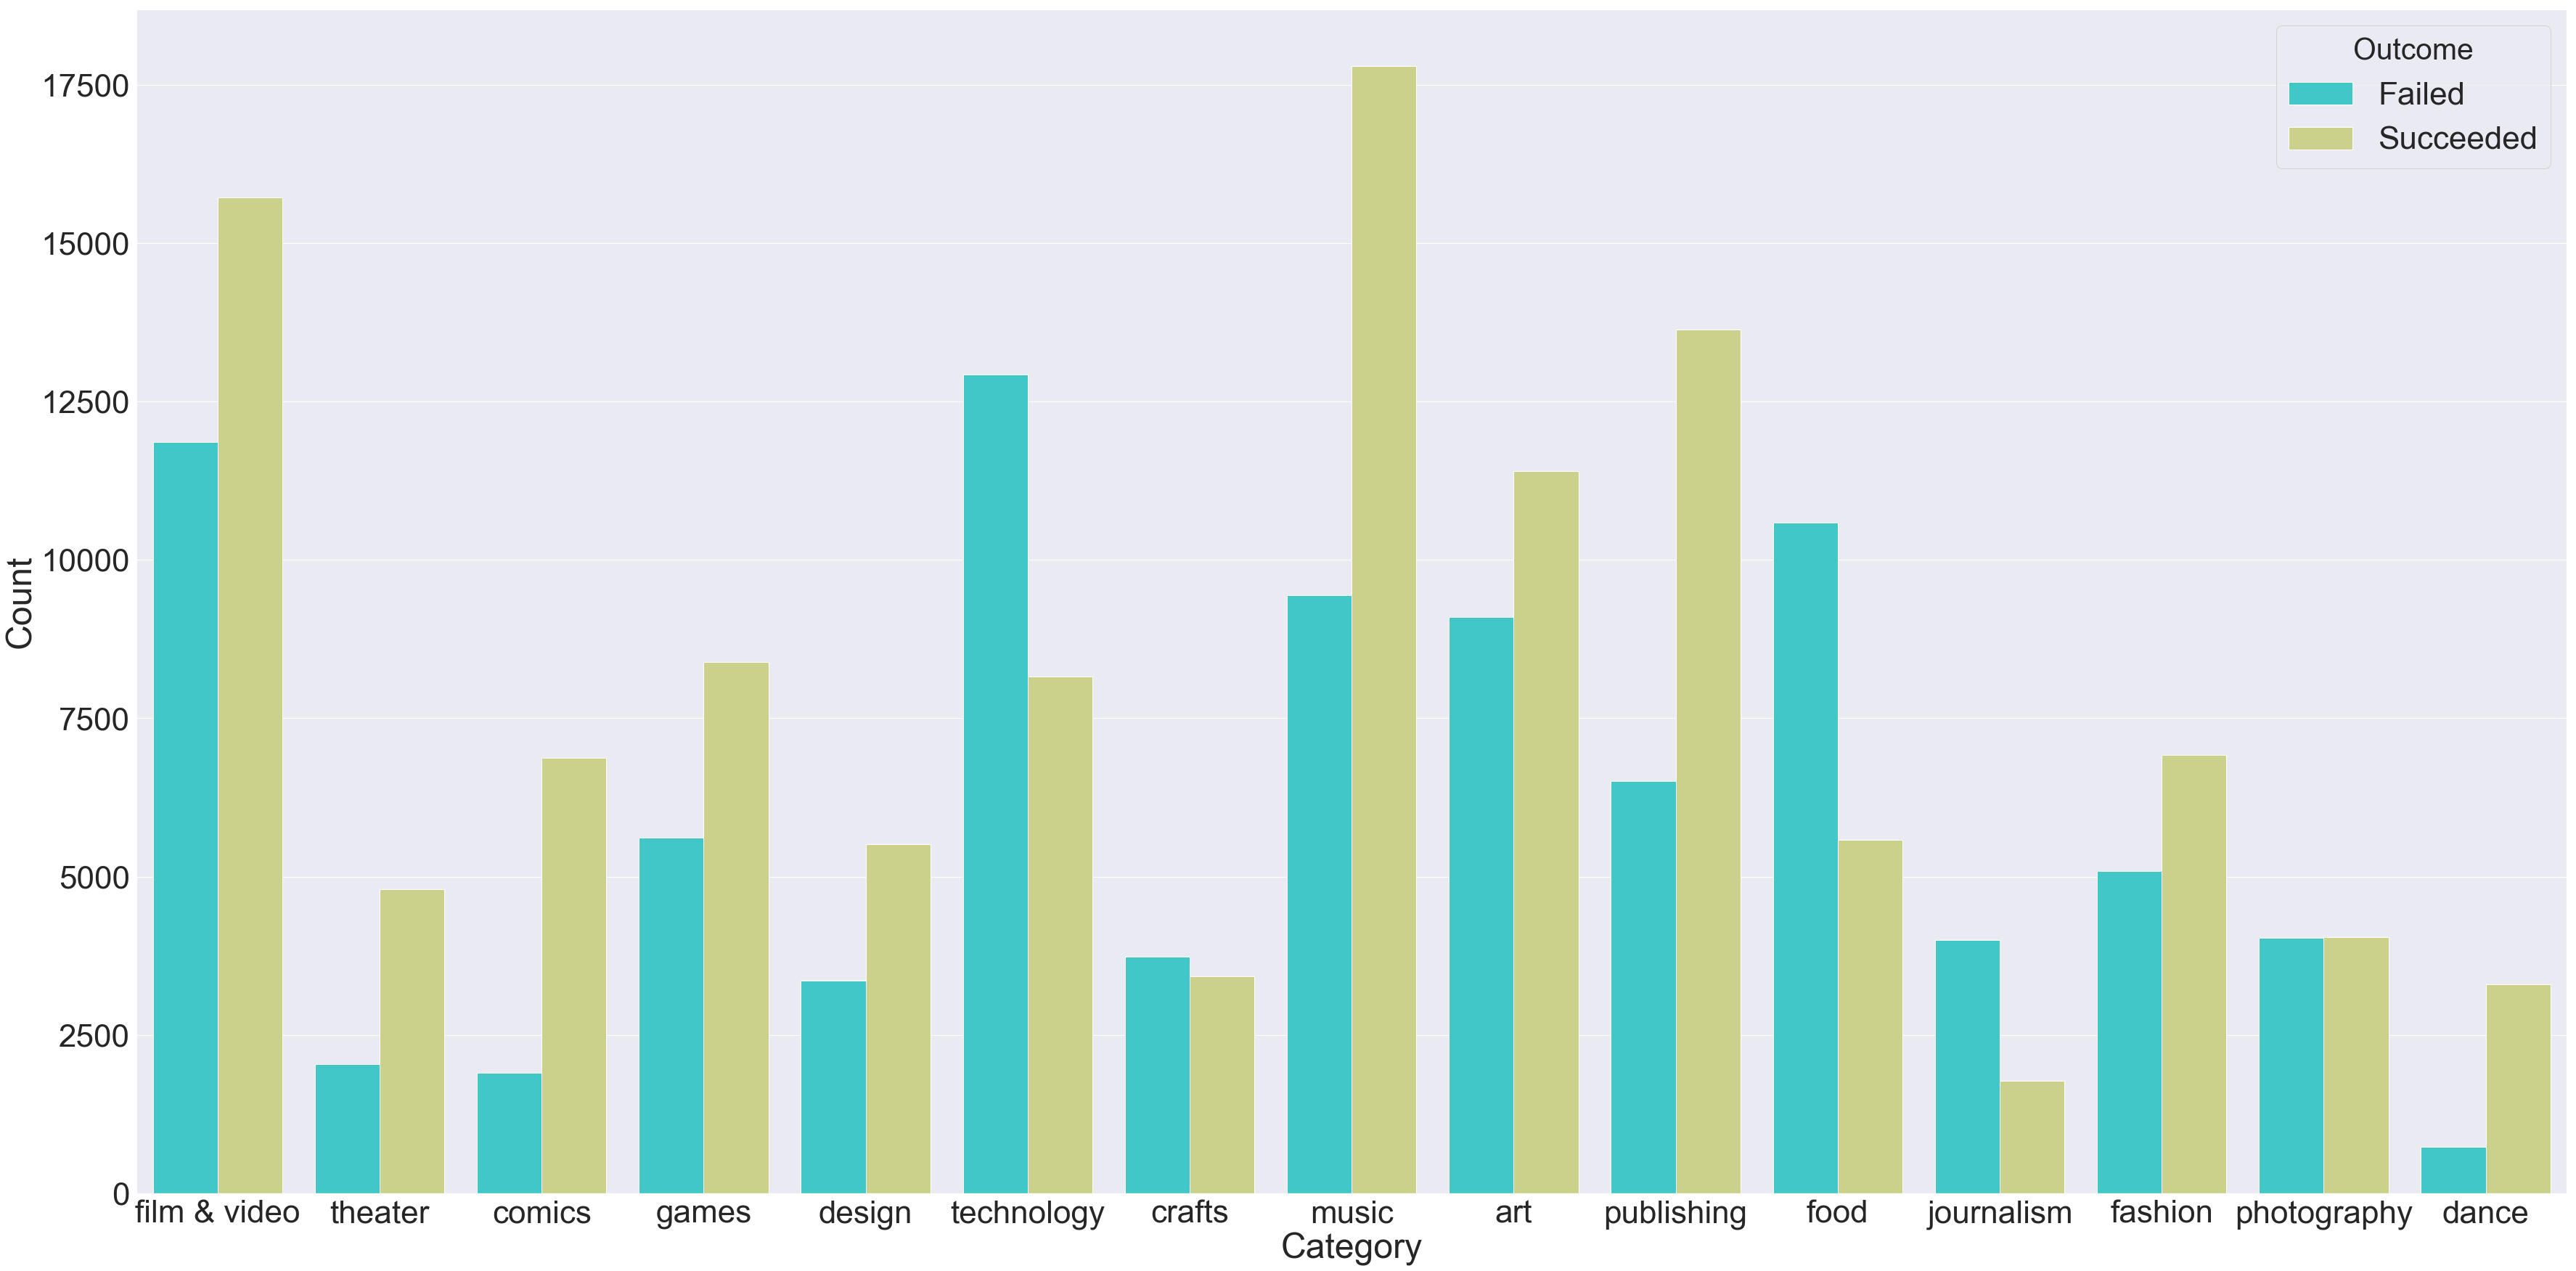

In [119]:
sns.set(font_scale=4) 
plt.figure(figsize=(60,30))
ax = sns.countplot(x = 'sub_category', hue = 'state_successful', data=data_1, palette = 'rainbow')
leg = ax.get_legend()
leg.set_title("Outcome")
labs = leg.texts
labs[0].set_text("Failed")
labs[1].set_text("Succeeded")

ax.set(xlabel='Category', ylabel='Count')
#plt.savefig('eda.svg')
#plt.savefig('eda.png')
plt.tight_layout
plt.savefig("success_No_succes.png")

In [46]:
pickle.dump(data_1, open("kickstarter.pkl", "wb" ) )